<a href="https://colab.research.google.com/github/MACHADOLRP/sigmoidal_data_science/blob/main/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Lisboa*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-02-13/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada 
* `host_id` - Número de id do proprietário(anfitrião) da propriedade. 
* `host_name` - Nome do anfitrião
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade.
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui 
* `last_review` - data do último review
* `review_per_month`- quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo amfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,27,2021-01-26,0.34,1,341
1,25659,Heart of Alfama - Lisbon Center,107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,30,10,113,2019-12-08,1.36,1,108
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,38,3,325,2021-01-10,2.64,1,303
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,25,2,265,2021-01-22,2.49,2,323
4,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74712,-9.15286,Entire home/apt,48,5,40,2021-01-24,0.31,1,294


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 19877
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada á quantidade de valores ausentes.É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.
* É possível ver que a coluna `reviews_per_month` e `last_review` possuem cerca de 18% de valores nulos.
* As variáveis `name`e `host_name`têm aproximadamente 0,05% dos valores nulos.
*As demais variáveis não possuem valores faltando.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


reviews_per_month                 0.176737
last_review                       0.176737
name                              0.000503
host_name                         0.000302
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

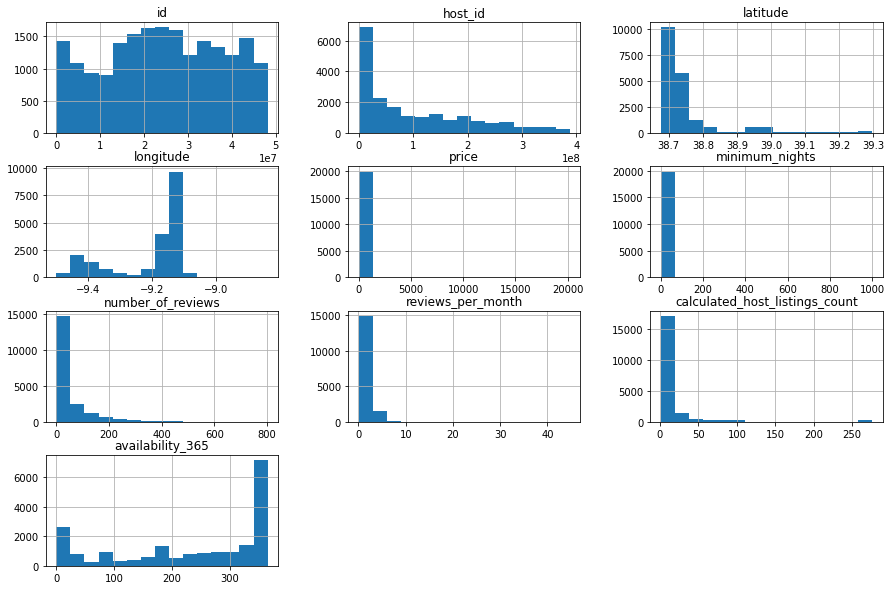

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual analise do resumo estatístico?**

In [7]:

# resumo estatístico
df[['price','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19877.000000,19877.000000,19877.000000,16364.000000,19877.000000,19877.000000
mean,95.248126,3.797505,42.871610,1.159754,13.231222,233.768677
std,260.058829,16.302138,67.660159,1.250472,35.477287,133.028502
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.000000,1.000000,2.000000,0.240000,1.000000,122.000000
50%,60.000000,2.000000,13.000000,0.720000,3.000000,278.000000
75%,94.000000,3.000000,55.000000,1.730000,10.000000,361.000000
max,20199.000000,1000.000000,802.000000,44.750000,276.000000,365.000000


Observando o resumo estatístico acima, pode-se confirmar algumas hipóteses como:
* A variável `price`possui 75% do valor abaixo de 94, média 95, porém seu valor máximo é 20.199,00.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano
* A quantidade máxima de `number_of_reviews` é 802, enquanto 75% se encontram em 55
* A quantidade máxima de `calculated_host_listings_count` nos informa que um único anfitrião teria 276 imóveis

### **Q5. Qual o Boxplot para os dados?**




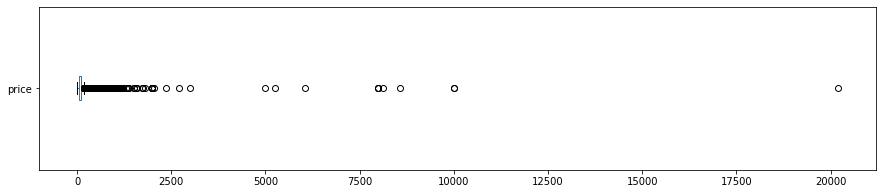

In [8]:
# price
df.price.plot(kind='box' , vert=False, figsize=(15, 3))
plt.show()

In [9]:
# ver quantidade de valores acima de 190 para price

print('\nprice: valores acima de 190')
print('{} entradas'.format(len(df[df.price > 190])))
print('{:.4f}%'.format((len(df[df.price > 190])/ df.shape[0])*100))



price: valores acima de 190
1386 entradas
6.9729%


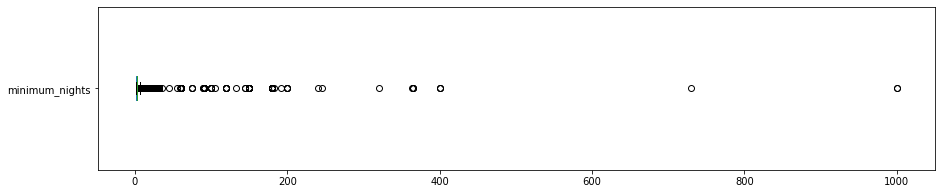

minimum_nights: valores acima de 30:
114 entradas
0.5735%


In [ ]:
# ver quantidade de valores acima de 30 dias
df.minimum_nights.plot(kind='box' , vert=False, figsize=(15,3))
plt.show()

print('minimum_nights: valores acima de 30:')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30])/ df.shape[0])*100))



number_of_reviews: valores acima de 150
1535 entradas
7.7225%


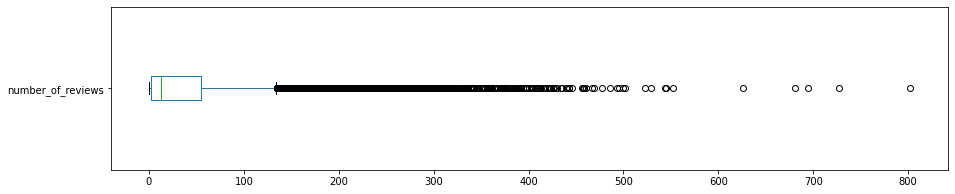

In [13]:
# ver quantidade de valores
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))
plt.show

#ver quantidade acima de 150 para number_of_reviews
print('\nnumber_of_reviews: valores acima de 150')
print('{} entradas'.format(len(df[df.number_of_reviews > 150])))
print('{:.4f}%'.format((len(df[df.number_of_reviews > 150]) / df.shape[0])*100))

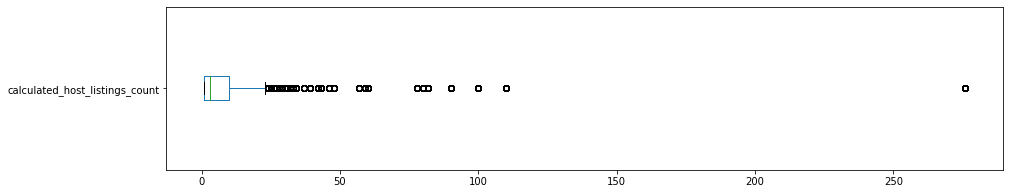


calculated_host_listings_count: valores acima de  25
2066 entradas
10.3939%


In [22]:
#ver calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#ver quantidades de valores acima de 25
print('\ncalculated_host_listings_count: valores acima de  25')
print('{} entradas'.format(len(df[df.calculated_host_listings_count > 25])))
print('{:.4f}%'.format((len(df[df.calculated_host_listings_count > 25]) / df.shape[0])*100))


## Histograma  sem outliers

Já que identificamos *outliers* nas variáveis `price`, `minimum_nights`, `number_of_reviews` e `calculated_host_listings_count`, faremos agora a limpeza do *DataFrame* delas e plotaremos novamente o histograma.

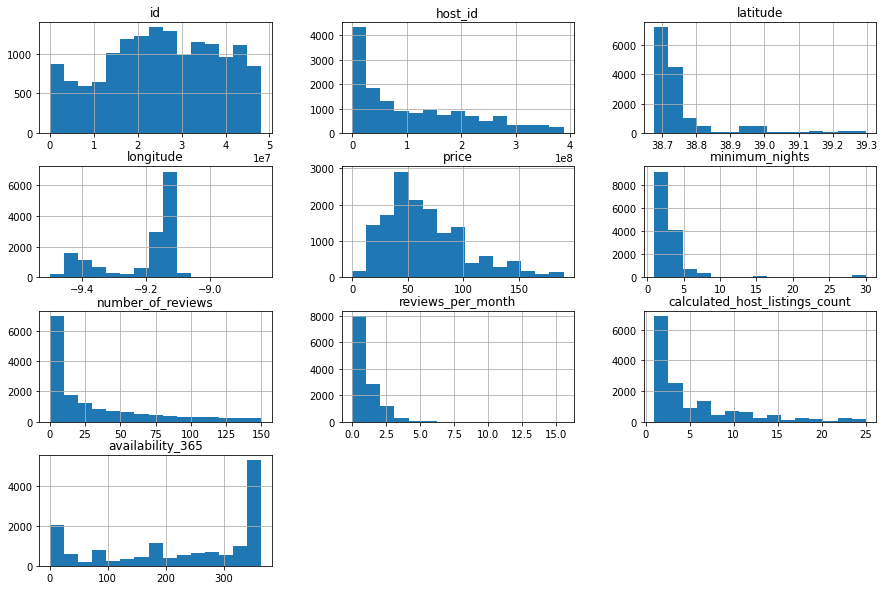

In [24]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 190].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 150].index, axis=0, inplace=True )
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 25].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


### **Q6. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto , estamos buscandorelação ou semelhança entre duas variáveis.
Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificaras correlções existentes entre as variáveis de interesse, vou:
* Criar uma matriz de correlção
* Gerar um *hestmap* a partir dessa matriz, usando a biblioteca `seaborn`


In [25]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count','availability_365' ]].corr()
display(corr)


# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.051469,-0.110742,-0.163834,-0.031862,0.033695
minimum_nights,-0.051469,1.000000,-0.041785,-0.065373,-0.043859,-0.032537
number_of_reviews,-0.110742,-0.041785,1.000000,0.800085,-0.054737,-0.015915
reviews_per_month,-0.163834,-0.065373,0.800085,1.000000,-0.007680,-0.023435
calculated_host_listings_count,-0.031862,-0.043859,-0.054737,-0.007680,1.000000,0.018381
availability_365,0.033695,-0.032537,-0.015915,-0.023435,0.018381,1.000000


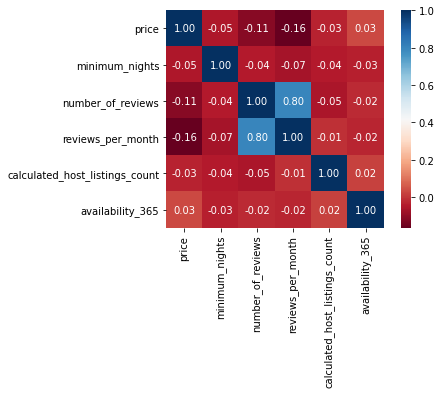

In [26]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média


In [ ]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

## Conclusões
